In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns

In [52]:
# get the DF used for setting the weights and analysis
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(0.5 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df1 = df[df['radiant_win'].notnull()]

2017-05-24 21:56:54.216767
Using this many files 4978


In [53]:

df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df1.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [54]:
df = df[~df['match_id'].duplicated()]

In [55]:
df = df.sort_values(by='residual', ascending=False)

In [56]:
df

,barracks_status_dire,barracks_status_radiant,dire_pos1,dire_pos1_ancient_kills,dire_pos1_apm,dire_pos1_assists,dire_pos1_camps_stacked,dire_pos1_courier_kills,dire_pos1_deaths,dire_pos1_denies,...,radiant_pos5_rune_pickups,radiant_pos5_sentry_uses,radiant_pos5_totalgold,radiant_pos5_totalxp,radiant_pos5_tower_kills,radiant_pos5_xpm,radiant_win,tower_status_dire,tower_status_radiant,residual
109,0,63,2,NaN,NaN,11,NaN,NaN,19,2,...,NaN,NaN,16907.0,21933.0,NaN,624,True,0,2046,22.209061
213,3,63,95,NaN,NaN,9,NaN,NaN,6,1,...,NaN,NaN,18668.0,23837.0,NaN,664,True,4,2047,21.943884
291,63,0,44,NaN,NaN,8,NaN,NaN,4,3,...,NaN,NaN,20607.0,23789.0,NaN,501,False,1958,0,18.733578
51,0,63,1,NaN,NaN,5,NaN,NaN,16,2,...,NaN,NaN,15610.0,20258.0,NaN,462,True,0,1846,17.712517
100,51,63,12,0.0,2.0,0,0.0,0.0,13,0,...,0.0,0.0,3841.0,1181.0,0.0,64,True,455,2044,17.554306
49,63,0,18,NaN,NaN,16,NaN,NaN,6,10,...,NaN,NaN,10009.0,16950.0,NaN,359,False,1958,0,17.452068
0,63,0,6,NaN,NaN,12,NaN,NaN,4,13,...,NaN,NaN,19866.0,26889.0,NaN,536,False,2038,0,17.027338
3,63,0,48,NaN,NaN,16,NaN,NaN,13,3,...,NaN,NaN,13738.0,18432.0,NaN,432,False,1972,0,16.665009
117,63,2,94,NaN,NaN,11,NaN,NaN,0,0,...,NaN,NaN,8353.0,9576.0,NaN,235,False,1974,0,16.160429
10,60,0,11,NaN,NaN,19,NaN,NaN,13,3,...,NaN,NaN,12435.0,15790.0,NaN,353,False,1824,0,15.959165


In [57]:
df['match_id'].values.tolist()

[3123250944,
 3123836672,
 3123271936,
 3123164928,
 3123386368,
 3123863552,
 3123284224,
 3123471104,
 3123779328,
 3123681280,
 3123486720,
 3123882496,
 3123589888,
 3123481088,
 3123663360,
 3123864576,
 3123854080,
 3123254784,
 3123678976,
 3123207424,
 3123082240,
 3123429376,
 3123927040,
 3123667200,
 3122996992,
 3123564288,
 3123871232,
 3123404544,
 3123449344,
 3123542016,
 3123028736,
 3123910912,
 3123555584,
 3123513088,
 3123068416,
 3123180032,
 3123256576,
 3123028992,
 3123865856,
 3123157248,
 3123020544,
 3123847936,
 3123257088,
 3123402752,
 3123442944,
 3123371264,
 3123159296,
 3123790592,
 3123644160,
 3123340288,
 3123776000,
 3123744256,
 3123327488,
 3123789568,
 3123740928,
 3123858944,
 3123740416,
 3123335168,
 3123898368,
 3123214592,
 3123148288,
 3123373568,
 3123070208,
 3123877120,
 3123717632,
 3123591168,
 3123472640,
 3123339264,
 3123026176,
 3123800320,
 3123112704,
 3123963904,
 3123937536,
 3123452160,
 3123604736,
 3123532032,
 3123052032,

In [58]:
df['residual'].values.tolist()

[22.209060668945312,
 21.943883895874023,
 18.733577728271484,
 17.71251678466797,
 17.554306030273438,
 17.452068328857422,
 17.0273380279541,
 16.665008544921875,
 16.160429000854492,
 15.9591646194458,
 15.91830062866211,
 15.886932373046875,
 15.774358749389648,
 15.649096488952637,
 15.478443145751953,
 15.44720458984375,
 15.016891479492188,
 14.751729965209961,
 14.522700309753418,
 14.47995376586914,
 14.256906509399414,
 14.188694953918457,
 14.107854843139648,
 14.056489944458008,
 13.941818237304688,
 13.873666763305664,
 13.83987045288086,
 13.628384590148926,
 13.320698738098145,
 12.832275390625,
 12.653865814208984,
 12.653337478637695,
 12.155566215515137,
 11.878121376037598,
 11.832610130310059,
 11.63698959350586,
 11.311620712280273,
 11.213419914245605,
 9.950775146484375,
 9.94602108001709,
 9.781078338623047,
 9.689166069030762,
 9.47860336303711,
 9.389580726623535,
 9.37009334564209,
 9.318592071533203,
 9.311714172363281,
 9.270665168762207,
 9.255437850952148

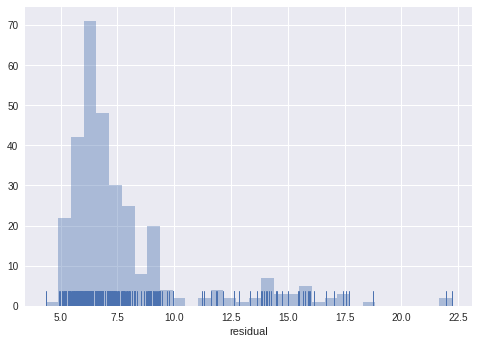

In [59]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [60]:
len(df)

311

In [61]:
plt.close()

In [62]:
residuals = df['residual'].values.tolist()

In [63]:
np.max(residuals) - np.min(residuals)

17.860499382019043

In [64]:
df['residual']

109    22.209061
213    21.943884
291    18.733578
51     17.712517
100    17.554306
49     17.452068
0      17.027338
3      16.665009
117    16.160429
10     15.959165
130    15.918301
48     15.886932
255    15.774359
40     15.649096
96     15.478443
6      15.447205
30     15.016891
106    14.751730
141    14.522700
110    14.479954
60     14.256907
132    14.188695
261    14.107855
166    14.056490
76     13.941818
227    13.873667
66     13.839870
237    13.628385
239    13.320699
119    12.832275
         ...    
50      5.603206
256     5.589380
269     5.585308
292     5.550658
176     5.545787
304     5.511973
29      5.500847
38      5.458397
77      5.427690
107     5.427026
177     5.425073
214     5.400080
168     5.370852
14      5.366636
266     5.363937
153     5.362718
111     5.316303
64      5.312134
131     5.240119
271     5.225935
79      5.215228
220     5.212704
46      5.160297
170     5.137635
34      5.109910
283     5.060087
128     5.044503
126     4.9817

In [65]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

In [66]:
kill_difference = df.apply(RadiantDireDifference, args=('kills',), axis=1)

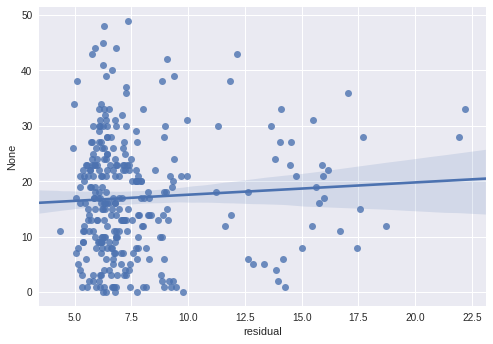

In [67]:
sns.regplot(df['residual'], np.abs(kill_difference))
plt.show()

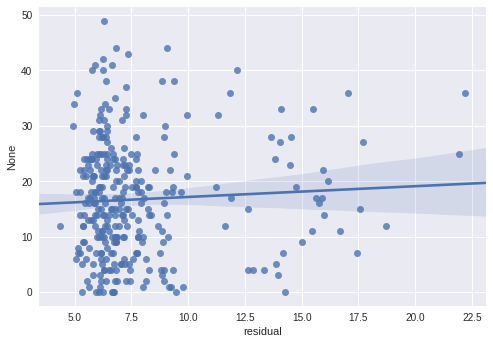

In [68]:
death_difference = df.apply(RadiantDireDifference, args=('deaths',), axis=1)
sns.regplot(df['residual'], np.abs(death_difference))
plt.show()

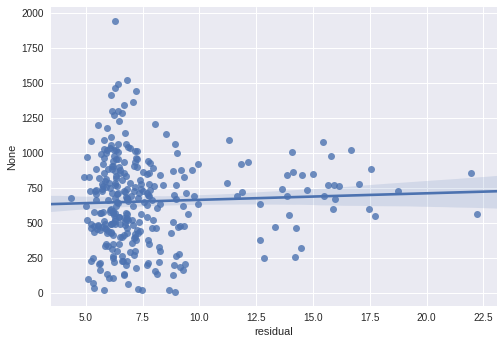

In [69]:
gold_difference = df.apply(RadiantDireDifference, args=('gpm',), axis=1)
sns.regplot(df['residual'], np.abs(gold_difference))
plt.show()

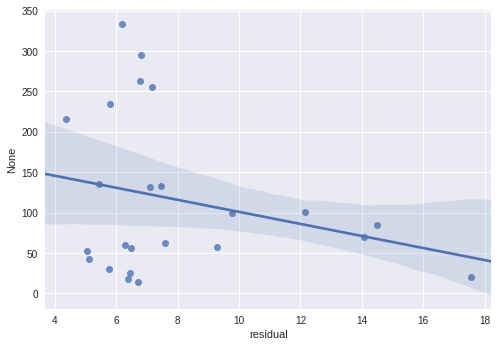

In [70]:
apm_difference = df.apply(RadiantDireDifference, args=('apm',), axis=1)
sns.regplot(df['residual'], np.abs(apm_difference))
plt.show()